In [1]:
#Describe the data:

In [2]:
### Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic


In [3]:
# to read all sheets to a map
xls = pd.ExcelFile('/Users/pablogtorres/Bootcamp/Module2/Project/stats.xls')
scenarios = pd.read_excel(xls, 'Scenarios', index_col='Quartely')
scenarios.head()

,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)",Model
Quartely,,,,,,
Q1 07,0.933344,1.817500,5.5,2.878960,9.167663,Baseline
Q2 07,0.619953,2.191668,5.3,2.506266,9.845725,Baseline
Q3 07,0.776288,2.879213,5.3,1.784932,10.393607,Baseline
Q4 07,0.471072,2.829605,5.0,2.101360,8.896052,Baseline
Q1 08,0.542505,2.431423,5.1,2.386790,6.168789,Baseline


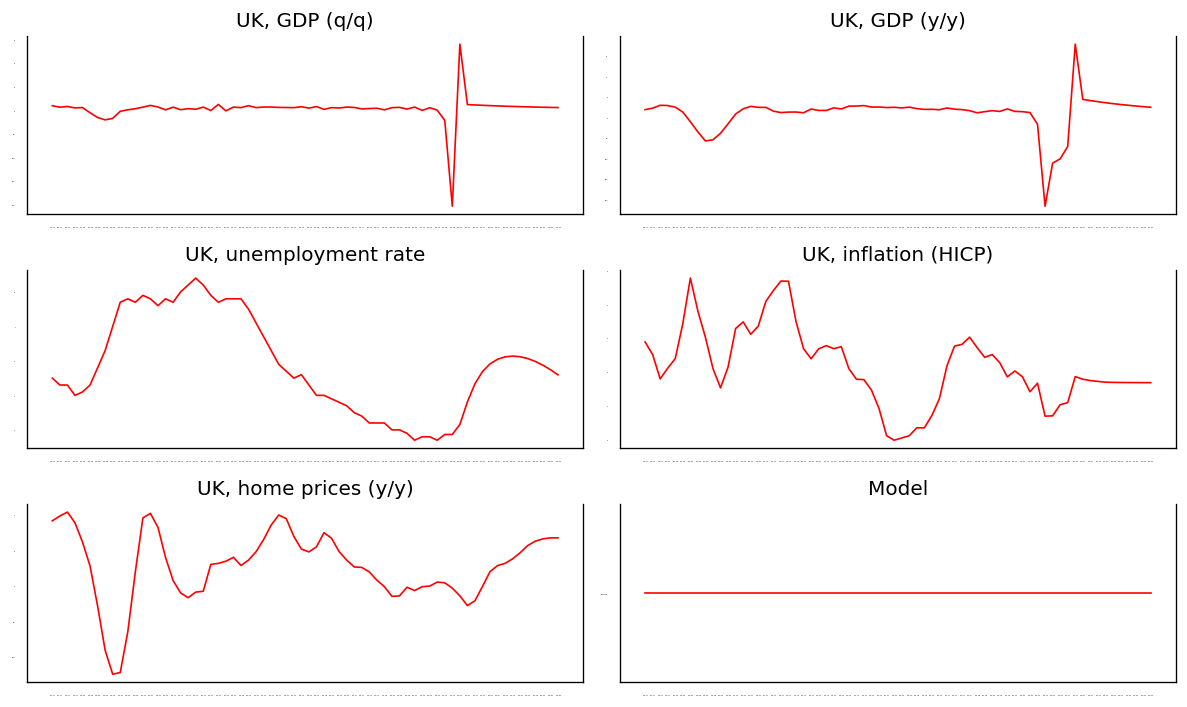

In [4]:
# Plot Model using scenario selection:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = scenarios.loc[scenarios['Model'] == 'Baseline'][scenarios.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(scenarios.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=0)

plt.tight_layout();


In [11]:
dq = pd.read_excel(xls, 2, index_col='Quartely')

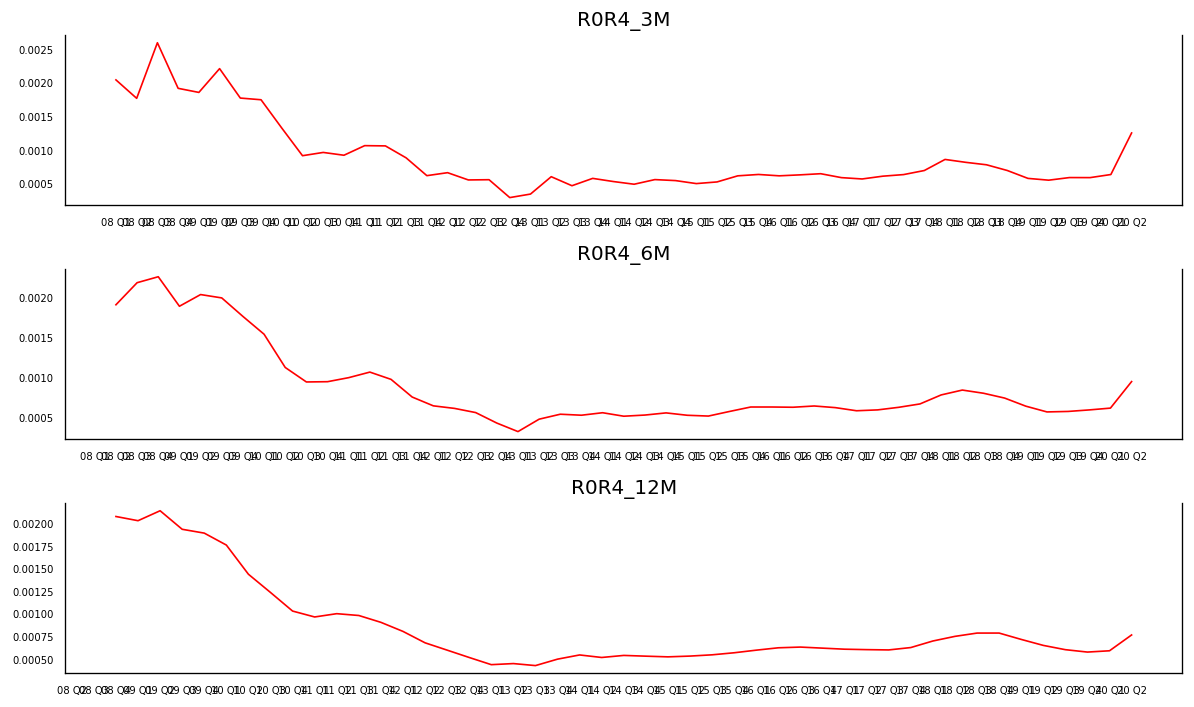

In [6]:
# Plot Delinquency actuals
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = dq[dq.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(dq.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [12]:
dq = dq.drop(columns = ['R0R4_6M', 'R0R4_12M'])

In [13]:
dq['Q'] = dq.index
dq['Y'] = dq.index
dq['Q'] = dq['Q'].str[2:]
dq['Y'] = dq['Y'].str[:-2]
dq['ind'] = dq['Q'].map(str) + ' ' + dq['Y'].map(str) 
dq = dq.set_index('ind')
dq = dq.drop(columns=['Q'])
dq = dq.drop(columns=['Y'])
dq['k1'] = dq.index
dq.head()

,R0R4_3M,k1
ind,,
Q1 08,0.002035,Q1 08
Q2 08,0.001761,Q2 08
Q3 08,0.002586,Q3 08
Q4 08,0.001910,Q4 08
Q1 09,0.001849,Q1 09


In [13]:
fav = scenarios.loc[scenarios['Model'] == 'Favourable']
fav = fav.drop(columns=['Model'])

In [14]:
fav.tail()

,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
Quartely,,,,,
Q4 22,1.360860,5.851365,4.289699,2.565610,9.944482
Q1 23,0.984733,5.306975,4.001715,2.646259,10.886140
Q2 23,0.946874,4.780520,3.729208,2.664148,11.231094
Q3 23,0.912024,4.270583,3.457433,2.717508,11.153848
Q4 23,0.879946,3.775863,3.179326,2.705822,10.782627


In [15]:
base = scenarios.loc[scenarios['Model'] == 'Baseline']
base = base.drop(columns=['Model'])

In [16]:
base.tail()

,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
Quartely,,,,,
Q4 22,0.690860,3.082181,6.066631,1.678194,5.685452
Q1 23,0.649733,2.890970,5.983963,1.676316,6.294841
Q2 23,0.611874,2.715177,5.875664,1.675096,6.624064
Q3 23,0.577024,2.553550,5.745184,1.674160,6.759679
Q4 23,0.544946,2.404936,5.595603,1.673379,6.763964


In [17]:
adve = scenarios.loc[scenarios['Model'] == 'Adversed']
adve = adve.drop(columns=['Model'])

In [18]:
adve.tail()

,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
Quartely,,,,,
Q4 22,-0.109140,-0.152729,8.188341,0.206486,-2.052101
Q1 23,0.249733,0.059821,8.350826,0.137149,-2.215055
Q2 23,0.211874,0.287801,8.438597,0.107936,-2.196032
Q3 23,0.177024,0.530140,8.476828,0.071116,-2.038035
Q4 23,0.144946,0.785852,8.480709,0.101865,-1.476152


In [19]:
base['k1'] = base.index
fav['k1'] = fav.index
adve['k1'] = adve.index

In [20]:
adve.tail()

,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)",k1
Quartely,,,,,,
Q4 22,-0.109140,-0.152729,8.188341,0.206486,-2.052101,Q4 22
Q1 23,0.249733,0.059821,8.350826,0.137149,-2.215055,Q1 23
Q2 23,0.211874,0.287801,8.438597,0.107936,-2.196032,Q2 23
Q3 23,0.177024,0.530140,8.476828,0.071116,-2.038035,Q3 23
Q4 23,0.144946,0.785852,8.480709,0.101865,-1.476152,Q4 23


In [21]:
base['k1'] = base['k1'].str.strip()
fav['k1'] = fav['k1'].str.strip()
adve['k1'] = adve['k1'].str.strip()

In [22]:
dq['k1'] = dq['k1'].str.strip()

In [23]:
dq.tail()

,R0R4_3M,k1
ind,,
Q2 19,0.000547,Q2 19
Q3 19,0.000586,Q3 19
Q4 19,0.000585,Q4 19
Q1 20,0.000631,Q1 20
Q2 20,0.001247,Q2 20


In [24]:
base['k1'][4] == dq['k1'][0]

True

In [25]:
fav['k1'][4] == dq['k1'][0]

True

In [26]:
adve['k1'][4] == dq['k1'][0]

True

In [37]:
actuals = pd.merge(dq,base, how="inner", left_on='k1', right_on='k1')

In [38]:
actuals.tail()

,R0R4_3M,k1,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
45,0.000547,Q2 19,-0.056563,1.408530,3.800000,2.018895,-0.119558
46,0.000586,Q3 19,0.511654,1.332420,3.800000,1.850141,-0.039091
47,0.000585,Q4 19,-0.000191,1.115730,3.700000,1.402744,0.527488
48,0.000631,Q1 20,-2.187179,-1.742512,3.866667,1.655733,0.426505
49,0.001247,Q2 20,-20.374743,-21.717944,3.866667,0.680272,-0.319746


In [39]:
actuals = actuals.set_index('k1')

In [40]:
m_baseline.head()

,R0R4_3M,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
k1,,,,,,
Q1 08,0.002035,0.542505,2.431423,5.1,2.386790,6.168789
Q2 08,0.001761,-0.554747,1.235576,5.3,3.422983,2.789840
Q3 08,0.002586,-1.563698,-1.115076,5.8,4.771617,-2.848316
Q4 08,0.001910,-2.065366,-3.611471,6.3,3.793341,-9.092118
Q1 09,0.001849,-1.747264,-5.806636,7.0,3.014471,-12.461284


In [41]:
actuals.to_csv ('actuals.csv', index = True, header=True) 

In [42]:
m_baseline_forecast = pd.merge(dq,base, how="right", left_on='k1', right_on='k1')
m_fav_forecast = pd.merge(dq,fav, how="right", left_on='k1', right_on='k1')
m_adve_forecast = pd.merge(dq,adve, how="right", left_on='k1', right_on='k1')

In [43]:
m_baseline_forecast.tail(20)

,R0R4_3M,k1,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
48,0.000574,Q1 19,0.658128,2.000321,3.700000,1.845338,-0.669339
49,0.000547,Q2 19,-0.056563,1.408530,3.800000,2.018895,-0.119558
50,0.000586,Q3 19,0.511654,1.332420,3.800000,1.850141,-0.039091
51,0.000585,Q4 19,-0.000191,1.115730,3.700000,1.402744,0.527488
52,0.000631,Q1 20,-2.187179,-1.742512,3.866667,1.655733,0.426505
53,0.001247,Q2 20,-20.374743,-21.717944,3.866667,0.680272,-0.319746
54,NaN,Q3 20,14.000000,-11.212739,4.158023,0.688903,-1.408104
55,NaN,Q4 20,1.176722,-10.167789,4.809708,1.020688,-2.786736
56,NaN,Q1 21,1.097085,-7.151491,5.336852,1.080863,-2.101111
57,NaN,Q2 21,1.023747,17.800615,5.691021,1.852805,-0.091351


In [44]:
m_adve_forecast.tail(20)

,R0R4_3M,k1,"UK, GDP (q/q)","UK, GDP (y/y)","UK, unemployment rate","UK, inflation (HICP)","UK, home prices (y/y)"
48,0.000574,Q1 19,0.658128,2.000321,3.700000,1.845338,-0.669339
49,0.000547,Q2 19,-0.056563,1.408530,3.800000,2.018895,-0.119558
50,0.000586,Q3 19,0.511654,1.332420,3.800000,1.850141,-0.039091
51,0.000585,Q4 19,-0.000191,1.115730,3.700000,1.402744,0.527488
52,0.000631,Q1 20,-2.187179,-1.742512,3.866667,1.655733,0.426505
53,0.001247,Q2 20,-20.374743,-21.717944,3.866667,0.680272,-0.319746
54,NaN,Q3 20,14.000000,-11.212739,4.158023,0.688903,-1.408104
55,NaN,Q4 20,1.176722,-10.167789,4.809708,1.020688,-2.786736
56,NaN,Q1 21,0.097085,-8.069900,5.452022,0.845018,-2.982811
57,NaN,Q2 21,0.023747,15.480858,6.041082,1.435130,-1.883242


In [45]:
m_baseline_forecast.to_csv ('m_baseline_forecast.csv', index = True, header=True) 
m_fav_forecast.to_csv ('m_fav_forecast.csv', index = True, header=True) 
m_adve_forecast.to_csv ('m_adve_forecast.csv', index = True, header=True) 